<a href="https://colab.research.google.com/github/NazrawitGemechu/AI-group-Assignment/blob/main/BigDataAnalaysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB
None
      PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13       

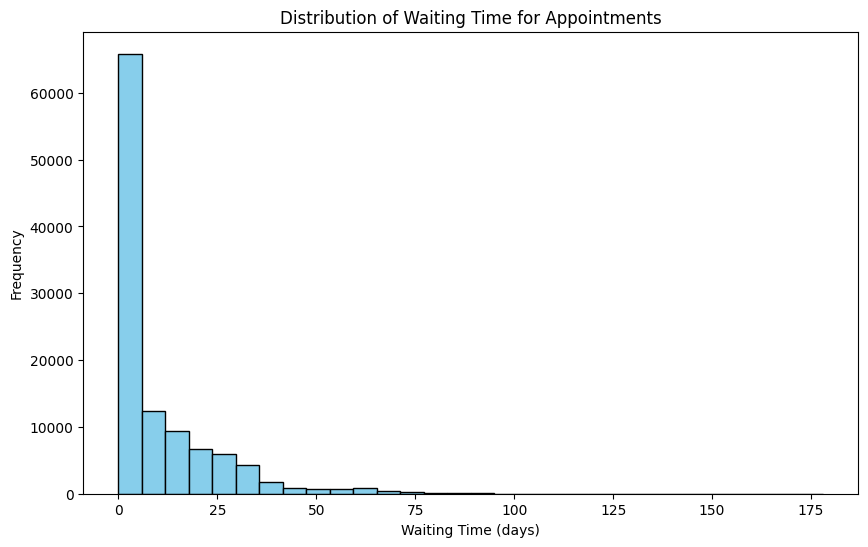

In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv")

# Display basic information about the dataset
print(df.info())

# Display the first few rows of the dataset
print(df.head())

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Convert 'ScheduledDay' and 'AppointmentDay' to datetime format
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

# Extract day of the week from 'AppointmentDay'
df['DayOfWeek'] = df['AppointmentDay'].dt.day_name()

# Create a new column 'WaitingTime' representing the number of days between scheduling and appointment
df['WaitingTime'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

# Handle negative waiting times (appointments scheduled after the appointment day)
df['WaitingTime'] = df['WaitingTime'].apply(lambda x: 0 if x < 0 else x)

# Explore the dataset after changes
print(df.head())

# Explore summary statistics
print(df.describe())

# Visualize the distribution of waiting times
plt.figure(figsize=(10, 6))
plt.hist(df['WaitingTime'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Waiting Time for Appointments')
plt.xlabel('Waiting Time (days)')
plt.ylabel('Frequency')
plt.show()


In [4]:
appointment_counts_by_day = df['DayOfWeek'].value_counts()
print(appointment_counts_by_day)


Wednesday    25867
Tuesday      25640
Monday       22715
Friday       19019
Thursday     17247
Saturday        39
Name: DayOfWeek, dtype: int64


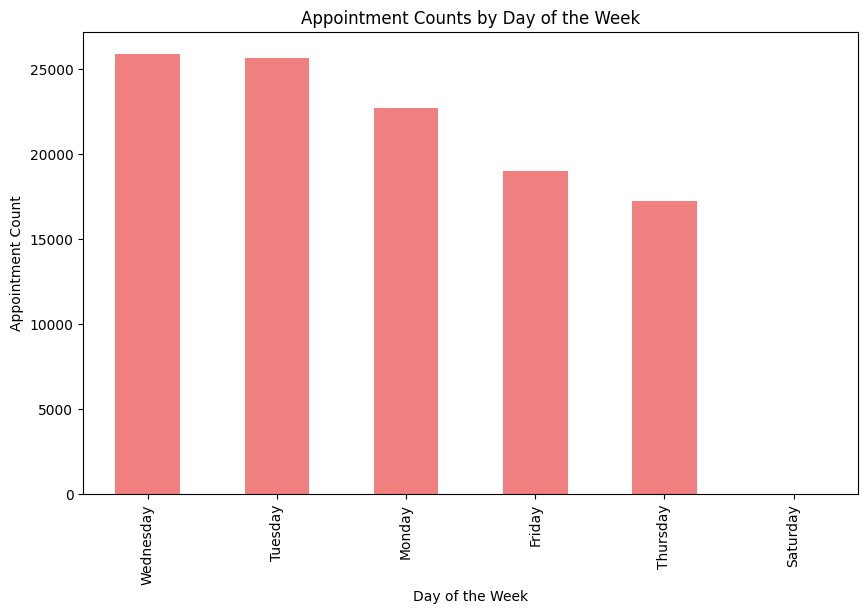

In [5]:
plt.figure(figsize=(10, 6))
appointment_counts_by_day.plot(kind='bar', color='lightcoral')
plt.title('Appointment Counts by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Appointment Count')
plt.show()


In [6]:
no_show_counts = df['No-show'].value_counts()
print(no_show_counts)


No     88208
Yes    22319
Name: No-show, dtype: int64


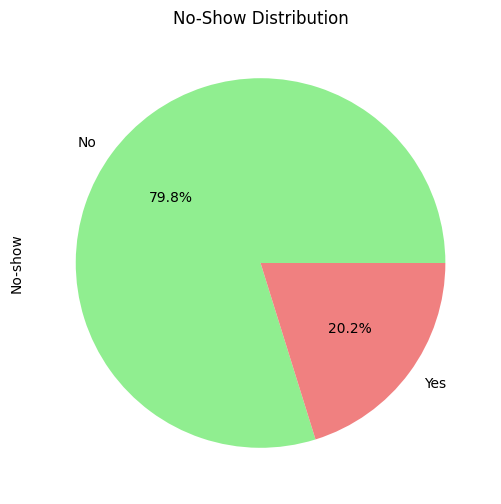

In [7]:
plt.figure(figsize=(6, 6))
df['No-show'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
plt.title('No-Show Distribution')
plt.show()


In [9]:
bins = [0, 18, 35, 50, 100]
labels = ['0-18', '19-35', '36-50', '51-100']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)


In [10]:
df = pd.get_dummies(df, columns=['DayOfWeek'], drop_first=True)


In [11]:
df['Gender'] = df['Gender'].map({'F': 0, 'M': 1})


51-100    37025
0-18      27379
19-35     24246
36-50     21865
Name: AgeGroup, dtype: int64


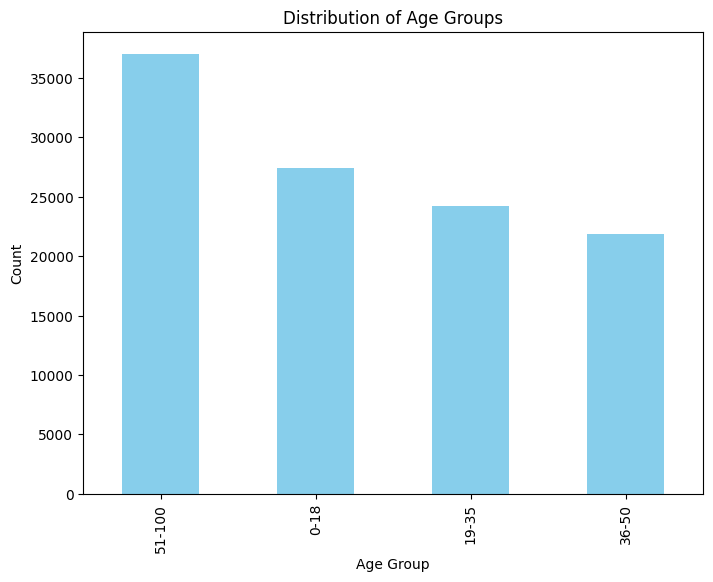

In [12]:
# Example: Explore and visualize the distribution of the 'AgeGroup' feature
age_group_counts = df['AgeGroup'].value_counts()
print(age_group_counts)

plt.figure(figsize=(8, 6))
df['AgeGroup'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()


In [13]:
q1 = df['WaitingTime'].quantile(0.25)
q3 = df['WaitingTime'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Handle outliers by capping the values
df['WaitingTime'] = df['WaitingTime'].clip(lower=lower_bound, upper=upper_bound)


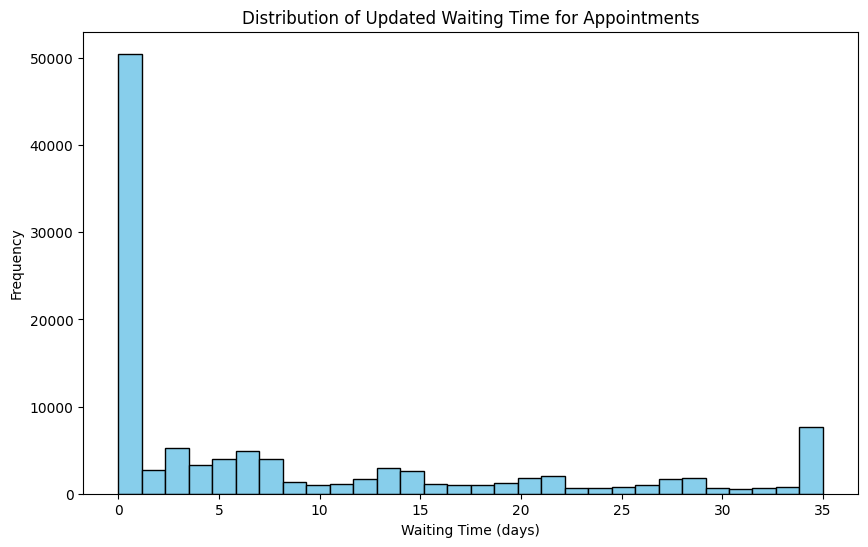

In [15]:
plt.figure(figsize=(10, 6))
plt.hist(df['WaitingTime'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Updated Waiting Time for Appointments')
plt.xlabel('Waiting Time (days)')
plt.ylabel('Frequency')
plt.show()


In [16]:
#step 4. Drawing conclusions with descriptive statistics.
# Display summary statistics for relevant columns
print(df[['Age', 'WaitingTime']].describe())



                 Age    WaitingTime
count  110527.000000  110527.000000
mean       37.088874       8.427434
std        23.110205      11.238083
min        -1.000000       0.000000
25%        18.000000       0.000000
50%        37.000000       3.000000
75%        55.000000      14.000000
max       115.000000      35.000000


In [18]:
# Explore correlations between variables
correlation_matrix = df[['Age', 'WaitingTime', 'Gender', 'DayOfWeek_Monday', 'DayOfWeek_Tuesday', 'DayOfWeek_Wednesday', 'DayOfWeek_Thursday', 'DayOfWeek_Saturday']].corr()
print(correlation_matrix)


                          Age  WaitingTime    Gender  DayOfWeek_Monday  \
Age                  1.000000     0.000419 -0.106440         -0.005788   
WaitingTime          0.000419     1.000000 -0.028316          0.022504   
Gender              -0.106440    -0.028316  1.000000          0.004095   
DayOfWeek_Monday    -0.005788     0.022504  0.004095          1.000000   
DayOfWeek_Tuesday    0.004054     0.003406 -0.009374         -0.279523   
DayOfWeek_Wednesday -0.000926    -0.010170 -0.002287         -0.281134   
DayOfWeek_Thursday   0.002816    -0.017783  0.004817         -0.218697   
DayOfWeek_Saturday   0.013415    -0.008345 -0.003687         -0.009556   

                     DayOfWeek_Tuesday  DayOfWeek_Wednesday  \
Age                           0.004054            -0.000926   
WaitingTime                   0.003406            -0.010170   
Gender                       -0.009374            -0.002287   
DayOfWeek_Monday             -0.279523            -0.281134   
DayOfWeek_Tuesday 

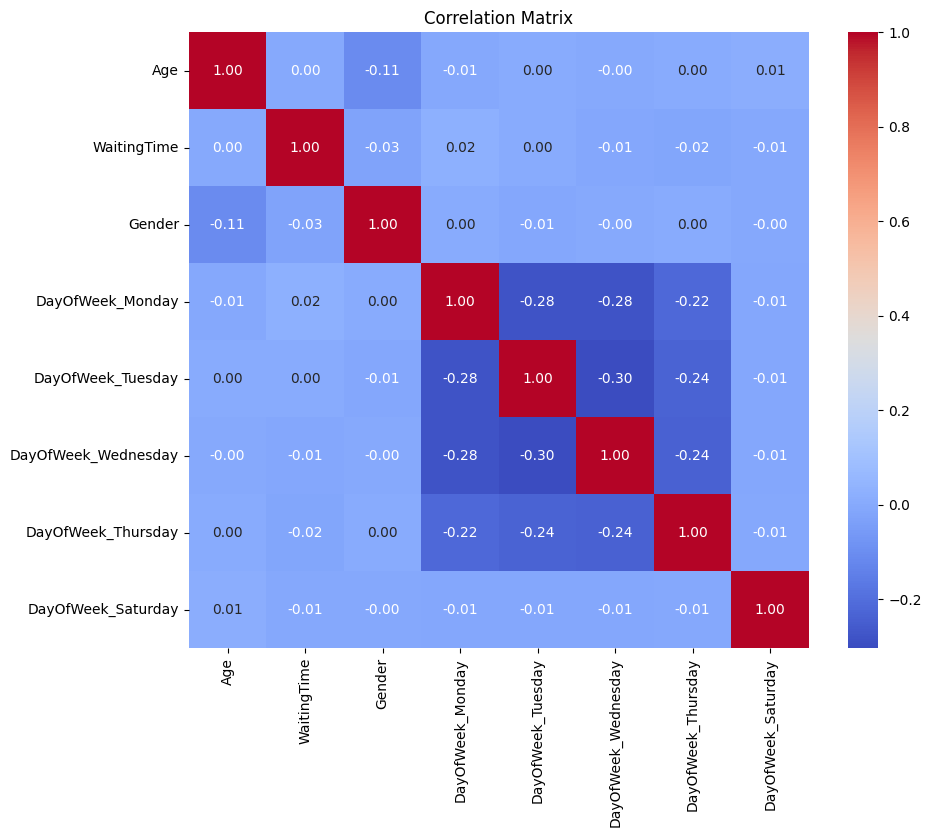

In [20]:
#Visualize Correlations
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [23]:
#Predictions (Machine Learning):Train-Test Split:
from sklearn.model_selection import train_test_split

# Specify features and target variable
X = df[['Age', 'WaitingTime', 'Gender', 'DayOfWeek_Monday', 'DayOfWeek_Tuesday', 'DayOfWeek_Wednesday', 'DayOfWeek_Thursday',  'DayOfWeek_Saturday']]
y = df['No-show']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
#Build a Simple Predictive Model (Logistic Regression):
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the model
model = LogisticRegression(random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.80
              precision    recall  f1-score   support

          No       0.80      1.00      0.89     17669
         Yes       0.33      0.00      0.00      4437

    accuracy                           0.80     22106
   macro avg       0.57      0.50      0.45     22106
weighted avg       0.71      0.80      0.71     22106

[[17655    14]
 [ 4430     7]]
